In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("C:/Ai-class/abalone.csv")
data

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 생성 및 적용
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])

# 결과 확인
print(data.head())

   id  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0    2   0.455     0.365   0.095        0.5140          0.2245   
1   1    2   0.350     0.265   0.090        0.2255          0.0995   
2   2    0   0.530     0.420   0.135        0.6770          0.2565   
3   3    2   0.440     0.365   0.125        0.5160          0.2155   
4   4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


In [9]:
data = data.drop(columns=['id'])

In [11]:
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [13]:
# 입력과 타겟 분리
X = data.drop('Rings', axis=1).values
y = data['Rings'].values.astype(np.float32)

In [15]:
# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 8), (836, 8), (3341,), (836,))

In [21]:
# TensorDataset으로 래핑
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [23]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [25]:
X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape

(torch.Size([3341, 8]),
 torch.Size([836, 8]),
 torch.Size([3341, 1]),
 torch.Size([836, 1]))

In [27]:
# 회귀 모델 정의
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RegressionModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [29]:
# 학습 루프
model.train()
for epoch in range(30):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")

print("Training complete.")

Epoch 1, Loss: 63.0202
Epoch 2, Loss: 14.4805
Epoch 3, Loss: 7.0498
Epoch 4, Loss: 6.1005
Epoch 5, Loss: 5.7171
Epoch 6, Loss: 5.4565
Epoch 7, Loss: 5.2513
Epoch 8, Loss: 5.0993
Epoch 9, Loss: 4.9623
Epoch 10, Loss: 4.8454
Epoch 11, Loss: 4.8061
Epoch 12, Loss: 4.7095
Epoch 13, Loss: 4.6322
Epoch 14, Loss: 4.6455
Epoch 15, Loss: 4.6562
Epoch 16, Loss: 4.5441
Epoch 17, Loss: 4.4833
Epoch 18, Loss: 4.4762
Epoch 19, Loss: 4.4752
Epoch 20, Loss: 4.4468
Epoch 21, Loss: 4.4760
Epoch 22, Loss: 4.4717
Epoch 23, Loss: 4.4615
Epoch 24, Loss: 4.4111
Epoch 25, Loss: 4.3791
Epoch 26, Loss: 4.3719
Epoch 27, Loss: 4.3955
Epoch 28, Loss: 4.3430
Epoch 29, Loss: 4.3361
Epoch 30, Loss: 4.3335
Training complete.


In [31]:
# 평가
model.eval()
preds, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        preds.extend(outputs)
        actuals.extend(y_batch.numpy())

mse = mean_squared_error(actuals, preds)
print(f"Test MSE: {mse:.4f}")

Test MSE: 4.6170


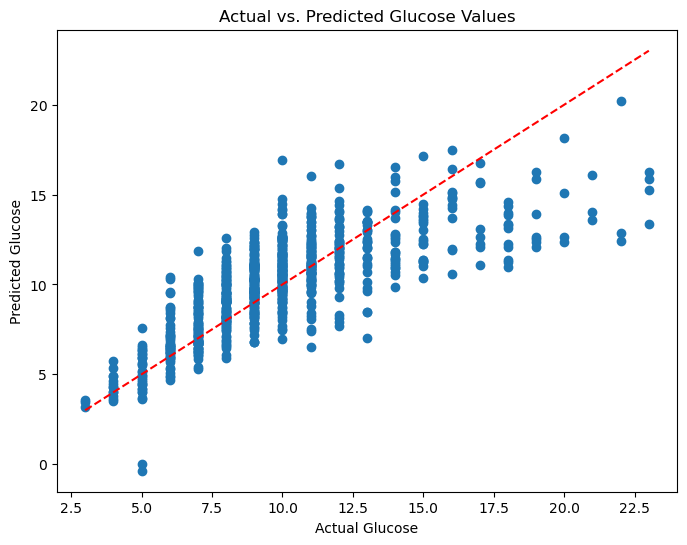

In [33]:
# 시각화 (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(actuals, preds)
plt.xlabel("Actual Glucose")
plt.ylabel("Predicted Glucose")
plt.title("Actual vs. Predicted Glucose Values")
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--')  # y=x line
plt.show()